# Cálculo de la frecuencia cardiaca a partir de los datos crudos del sensor

Esta vez me baso en otro artículo: https://www.researchgate.net/publication/319146237_Analisis_espectral_a_traves_de_bancos_de_filtros_aplicado_al_pre-procesamiento_para_la_umbralizacion_de_senales_de_pulso_oximetria/figures?lo=1

Propone un método basado en **bancos de filtros** para mejorar la detección de picos en la señal de pulso oximetría (SpO2) y, a partir de ahí, estimar la frecuencia cardíaca. Aunque está más centrado en la umbralización de la señal de SpO2 en relación con la onda R del ECG, he pensado que se podría adaptar su metodología a mi caso, donde tenemos señales crudas IR y RED del pulsioxímetro.

Pasos para aplicar la metodología:

- **Preprocesamiento de la señal**:

Filtrado **pasa banda** para eliminar ruido y aislar las frecuencias relevantes de la señal pulsátil. Según el artículo, un filtro pasa banda en el rango de 3-5 Hz puede ser útil para resaltar los picos de la señal de pulso.

- **Detección de picos:

    - Identificar los picos máximos en la señal IR o RED (la que tenga mejor relación con la variabilidad del pulso).

    - Aplicar un umbral basado en el histograma de la señal filtrada, similar a lo que se hace en el artículo con el ECG.

**Cálculo del intervalo entre picos (P-P):**

- Medir el tiempo entre picos consecutivos para obtener la frecuencia cardíaca instantánea.

- Convertirlo a BPM: HR = 60/intervalo medio en ms


**Validación con la FC externa medida:**

Comparar los valores obtenidos con la referencia externa (lo extraemos del nombre del archivo).

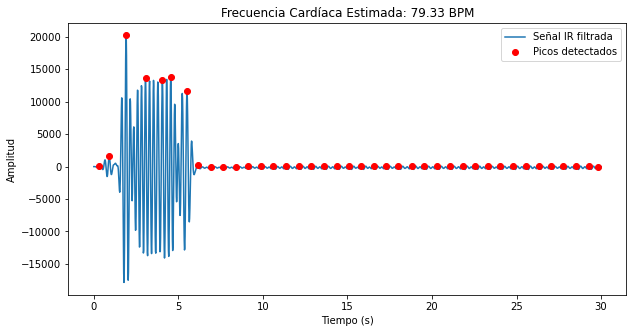

Frecuencia Cardíaca estimada: 79.33 BPM


In [8]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_98_81.csv"
data = pd.read_csv(file_path, delimiter=';', decimal=',')

# Extraer columnas
Tiempo = data['Tiempo (ms)'].values  # Tiempo en milisegundos
IR_signal = data['IR'].values  # Señal IR

# Convertir el tiempo a segundos
Tiempo_s = Tiempo / 1000.0

# Filtrado pasa banda (3-5 Hz) con un filtro FIR
fs = 60  # Frecuencia de muestreo estimada
nyquist = fs / 2
lowcut, highcut = 3, 5  # Frecuencias de corte en Hz
numtaps = 101  # Orden del filtro
fir_coeff = signal.firwin(numtaps, [lowcut / nyquist, highcut / nyquist], pass_zero=False)
IR_filtered = signal.lfilter(fir_coeff, 1.0, IR_signal)

# Detección de picos
peaks, _ = signal.find_peaks(IR_filtered, height=np.mean(IR_filtered), distance=fs/2)

# Cálculo de la frecuencia cardíaca
intervalos = np.diff(Tiempo_s[peaks])  # Diferencias entre picos (en segundos)
HR = 60 / np.mean(intervalos) if len(intervalos) > 0 else 0

# Gráfica de la señal con picos detectados
plt.figure(figsize=(10, 5))
plt.plot(Tiempo_s, IR_filtered, label='Señal IR filtrada')
plt.plot(Tiempo_s[peaks], IR_filtered[peaks], 'ro', label='Picos detectados')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Frecuencia Cardíaca Estimada: {HR:.2f} BPM")
plt.legend()
plt.show()

print(f"Frecuencia Cardíaca estimada: {HR:.2f} BPM")


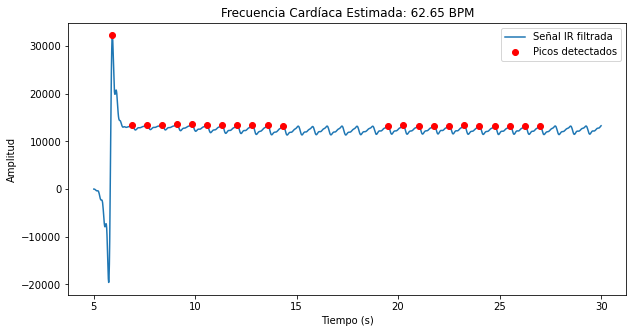

Frecuencia Cardíaca estimada: 62.65 BPM


In [9]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_98_81.csv"
data = pd.read_csv(file_path, delimiter=';', decimal=',')

# Extraer columnas
Tiempo = data['Tiempo (ms)'].values  # Tiempo en milisegundos
IR_signal = data['IR'].values  # Señal IR

# Convertir el tiempo a segundos
Tiempo_s = Tiempo / 1000.0

# Eliminar los primeros 5 segundos para reducir el ruido
mask = Tiempo_s >= 5  # Filtrar los datos desde el segundo 5 en adelante
Tiempo_s = Tiempo_s[mask]
IR_signal = IR_signal[mask]

# Filtrado pasa banda (0.5-5 Hz) con un filtro FIR
fs = 60  # Frecuencia de muestreo estimada
nyquist = fs / 2
lowcut, highcut = 0.5, 5  # Ampliamos el rango de frecuencias de corte
numtaps = 101  # Orden del filtro
fir_coeff = signal.firwin(numtaps, [lowcut / nyquist, highcut / nyquist], pass_zero=False)
IR_filtered = signal.lfilter(fir_coeff, 1.0, IR_signal)

# Detección de picos con ajuste de umbral
peaks, _ = signal.find_peaks(IR_filtered, height=np.percentile(IR_filtered, 90), distance=fs/2)

# Cálculo de la frecuencia cardíaca
intervalos = np.diff(Tiempo_s[peaks])  # Diferencias entre picos (en segundos)
HR = 60 / np.mean(intervalos) if len(intervalos) > 0 else 0

# Gráfica de la señal con picos detectados
plt.figure(figsize=(10, 5))
plt.plot(Tiempo_s, IR_filtered, label='Señal IR filtrada')
plt.plot(Tiempo_s[peaks], IR_filtered[peaks], 'ro', label='Picos detectados')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Frecuencia Cardíaca Estimada: {HR:.2f} BPM")
plt.legend()
plt.show()

print(f"Frecuencia Cardíaca estimada: {HR:.2f} BPM")

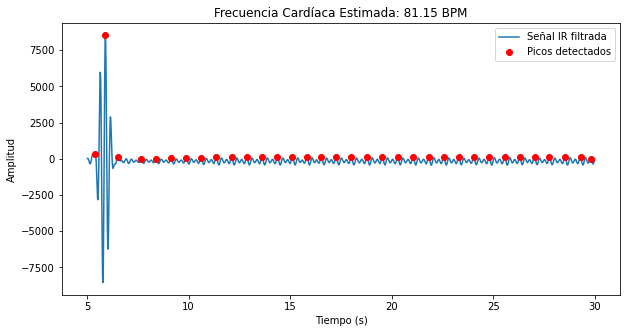

Frecuencia Cardíaca estimada: 81.15 BPM


In [12]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_98_81.csv"
data = pd.read_csv(file_path, delimiter=';', decimal=',')

# Extraer columnas
Tiempo = data['Tiempo (ms)'].values  # Tiempo en milisegundos
IR_signal = data['IR'].values  # Señal IR

# Convertir el tiempo a segundos
Tiempo_s = Tiempo / 1000.0

# Eliminar los primeros 5 segundos para reducir el ruido
mask = Tiempo_s >= 5  # Filtrar los datos desde el segundo 5 en adelante
Tiempo_s = Tiempo_s[mask]
IR_signal = IR_signal[mask]

# Filtrado pasa banda (3-5 Hz) con un filtro FIR
fs = 60  # Frecuencia de muestreo estimada (ajustar según corresponda)
nyquist = fs / 2
lowcut, highcut = 3, 5  # Frecuencias de corte en Hz
numtaps = 101  # Orden del filtro
fir_coeff = signal.firwin(numtaps, [lowcut / nyquist, highcut / nyquist], pass_zero=False)
IR_filtered = signal.lfilter(fir_coeff, 1.0, IR_signal)

# Detección de picos
peaks, _ = signal.find_peaks(IR_filtered, height=np.mean(IR_filtered), distance=fs/2)

# Cálculo de la frecuencia cardíaca
intervalos = np.diff(Tiempo_s[peaks])  # Diferencias entre picos (en segundos)
HR = 60 / np.mean(intervalos) if len(intervalos) > 0 else 0

# Gráfica de la señal con picos detectados
plt.figure(figsize=(10, 5))
plt.plot(Tiempo_s, IR_filtered, label='Señal IR filtrada')
plt.plot(Tiempo_s[peaks], IR_filtered[peaks], 'ro', label='Picos detectados')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Frecuencia Cardíaca Estimada: {HR:.2f} BPM")
plt.legend()
plt.show()

print(f"Frecuencia Cardíaca estimada: {HR:.2f} BPM")


Media de la señal filtrada: 24610.50
Desviación estándar de la señal filtrada: 3802.98


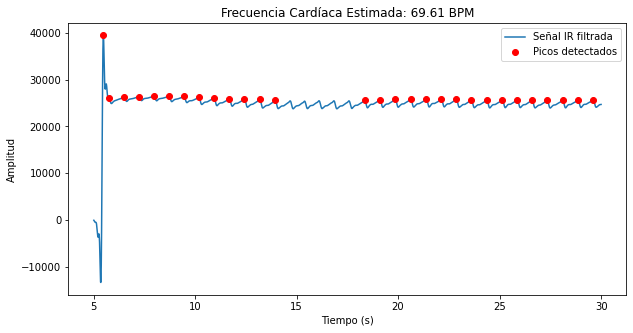

Frecuencia Cardíaca estimada: 69.61 BPM


In [17]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "C:/Users/Elena/Desktop/GitHub/TFG-Elena-Ruiz/Datos/Datos crudos/save_log2/raw_data_98_81.csv"
data = pd.read_csv(file_path, delimiter=';', decimal=',')

# Extraer columnas
Tiempo = data['Tiempo (ms)'].values  # Tiempo en milisegundos
IR_signal = data['IR'].values  # Señal IR

# Convertir el tiempo a segundos
Tiempo_s = Tiempo / 1000.0

# Eliminar los primeros 5 segundos para reducir el ruido
mask = Tiempo_s >= 5  # Filtrar los datos desde el segundo 5 en adelante
Tiempo_s = Tiempo_s[mask]
IR_signal = IR_signal[mask]

# Filtrado pasa banda (0.5-3 Hz) con un filtro FIR
fs = 60  # Frecuencia de muestreo estimada (ajustar según corresponda)
nyquist = fs / 2
lowcut, highcut = 0.6, 7  # Ajustamos el rango de frecuencias de corte
numtaps = 51  # Reducimos el orden del filtro
fir_coeff = signal.firwin(numtaps, [lowcut / nyquist, highcut / nyquist], pass_zero=False)
IR_filtered = signal.lfilter(fir_coeff, 1.0, IR_signal)

print(f'Media de la señal filtrada: {np.mean(IR_filtered):.2f}')
print(f'Desviación estándar de la señal filtrada: {np.std(IR_filtered):.2f}')

# Detección de picos con ajuste de umbral
threshold = np.percentile(IR_filtered, 75)
peaks, _ = signal.find_peaks(IR_filtered, height=threshold, distance=fs/4)  # Ajustamos la distancia mínima

# Cálculo de la frecuencia cardíaca
intervalos = np.diff(Tiempo_s[peaks])  # Diferencias entre picos (en segundos)
HR = 60 / np.mean(intervalos) if len(intervalos) > 0 else 0

# Gráfica de la señal con picos detectados
plt.figure(figsize=(10, 5))
plt.plot(Tiempo_s, IR_filtered, label='Señal IR filtrada')
plt.plot(Tiempo_s[peaks], IR_filtered[peaks], 'ro', label='Picos detectados')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Frecuencia Cardíaca Estimada: {HR:.2f} BPM")
plt.legend()
plt.show()

print(f"Frecuencia Cardíaca estimada: {HR:.2f} BPM")
